<h1 align="center"><font color="yellow">Torch Utils Tensorboard</font></h1>

<font color="yellow">Data Scientist.: PhD.Eddy Giusepe Chirinos Isidro</font>

Links de estudo:

* [TensorBoard: kit de ferramentas de visualização do TensorFlow](https://www.tensorflow.org/tensorboard?hl=pt-br)

<font color="orange">Depois de instalar o `TensorBoard`, esses utilitários permitem que você registre modelos e métricas do PyTorch em um diretório para visualização na `IU do TensorBoard`. `Scalars`, `imagens`, `histogramas`, `gráficos` e `visualizações de Embeddings` são todos compatíveis com modelos e tensores PyTorch, bem como `redes` e blobs Caffe2.

A classe `SummaryWriter` é sua entrada principal para registrar dados para consumo e visualização pelo TensorBoard. 



Por exemplo:</font>

In [ ]:
import torch
import torchvision

from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets, transforms

# Writer salvará seus files para o diretório ./runs/ por default
writer = SummaryWriter()

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST('mnist_train',
                          train=True,
                          download=True,
                          transform=transform
                         )

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=64,
                                          shuffle=True
                                         )

model = torchvision.models.resnet50(False)

# Fazemos com o modelo ResNet aceite escala cinza (grayscale) em vez de RGB
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

images, labels = next(iter(trainloader))

grid = torchvision.utils.make_grid(images)

writer.add_image('images', grid, 0)
writer.add_graph(model, images)
writer.close()


Podemos visualizar a seguir no Tensorboard ou podemos visualizar no Browser na seguinte URL: [http://localhost:6006/](http://localhost:6006/)

In [ ]:
%load_ext tensorboard

%tensorboard --logdir=runs


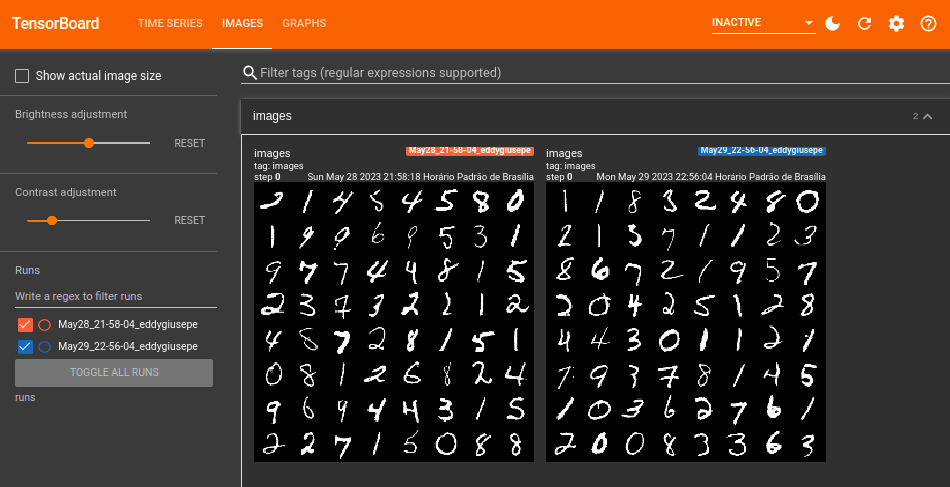

A seguir a estrutura da nossa `Rede Neural`.

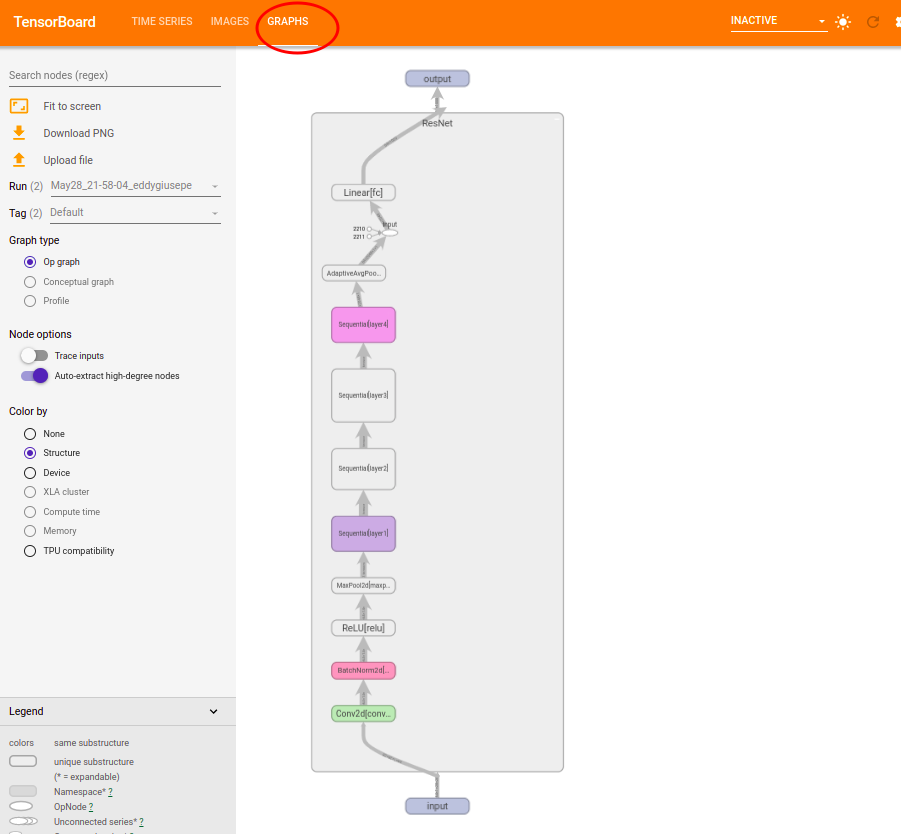

<font color="orange">Muitas informações podem ser registradas para um experimento. Para evitar sobrecarregar a interface do usuário e obter um melhor agrupamento de resultados, podemos agrupar gráficos nomeando-os hierarquicamente. <font color="red">Por exemplo:</font> `“Loss/train”` e `“Loss/test”` serão agrupados, enquanto `“Accuracy/train”` e `“Accuracy/test”` serão agrupados separadamente na interface do `TensorBoard`.</font>

In [3]:
from torch.utils.tensorboard import SummaryWriter
import numpy as np

writer = SummaryWriter()

for n_iter in range(100):
    writer.add_scalar('Loss/train', np.random.random(), n_iter)
    writer.add_scalar('Loss/test', np.random.random(), n_iter)
    writer.add_scalar('Accuracy/train', np.random.random(), n_iter)
    writer.add_scalar('Accuracy/test', np.random.random(), n_iter)
    

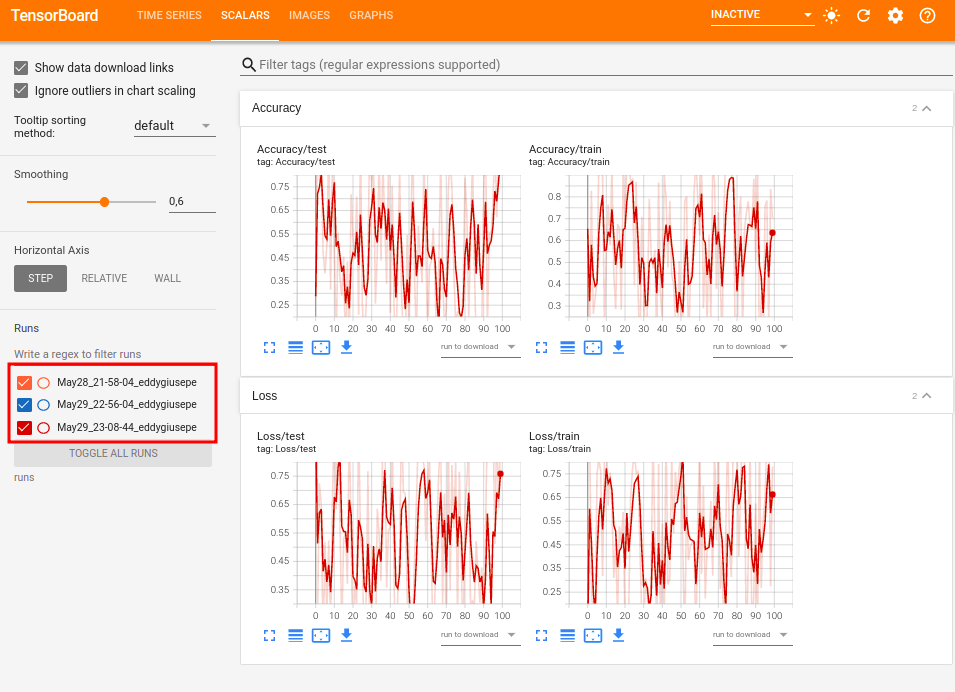

<font color="orange">A classe `SummaryWriter` tem as seguintes características (**por exemplo**):</font>

```
from torch.utils.tensorboard import SummaryWriter

# create a summary writer with automatically generated folder name.
writer = SummaryWriter()
# folder location: runs/May04_22-14-54_s-MacBook-Pro.local/

# create a summary writer using the specified folder name.
writer = SummaryWriter("my_experiment")
# folder location: my_experiment

# create a summary writer with comment appended.
writer = SummaryWriter(comment="LR_0.1_BATCH_16")
# folder location: runs/May04_22-14-54_s-MacBook-Pro.localLR_0.1_BATCH_16/
```



## <font color="red">Exemplo 1:</font>

In [ ]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

import math

x = range(720)
for i in x:
    writer.add_scalar('y=sen(x)', math.sin(i*math.pi/180), i)
writer.close()


# A seguir visualizamos no TensorBoard:
%load_ext tensorboard

%tensorboard --logdir=runs


Você deve ver o seguinte gráfico no Tensorboard:

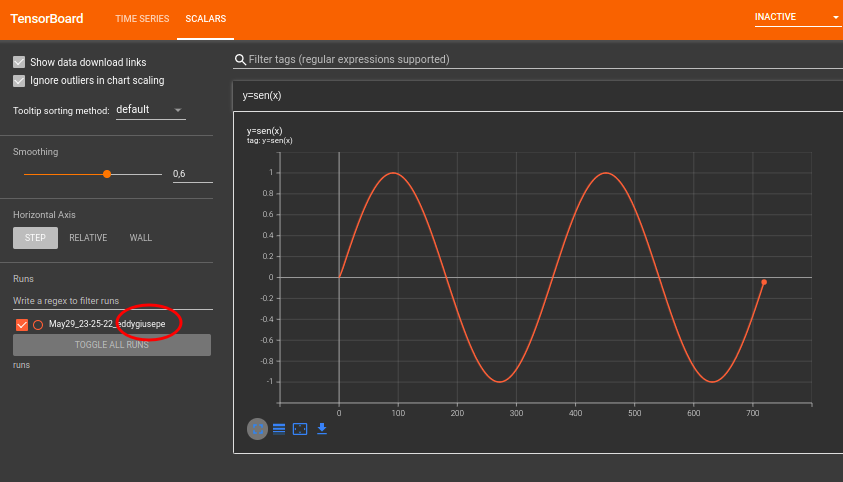

## <font color="red">Exemplo 2:</font>

Adiciona muitos dados `scalars` ao summary.

In [ ]:
from torch.utils.tensorboard import SummaryWriter
import numpy as np

writer = SummaryWriter()

r = 5
for i in range(100):
    writer.add_scalars('Eddy_tag', {'xsinx':i*np.sin(i/r),
                                    'xcosx':i*np.cos(i/r),
                                    'tanx': np.tan(i/r)}, i)
writer.close()
# Essa chamada adiciona três valores ao mesmo gráfico escalar com a tag "Eddy_tag" na seção
# escalar do tensorboard


# A seguir visualizamos no TensorBoard:
%load_ext tensorboard

%tensorboard --logdir=runs


Visualizamos os três gráficos:

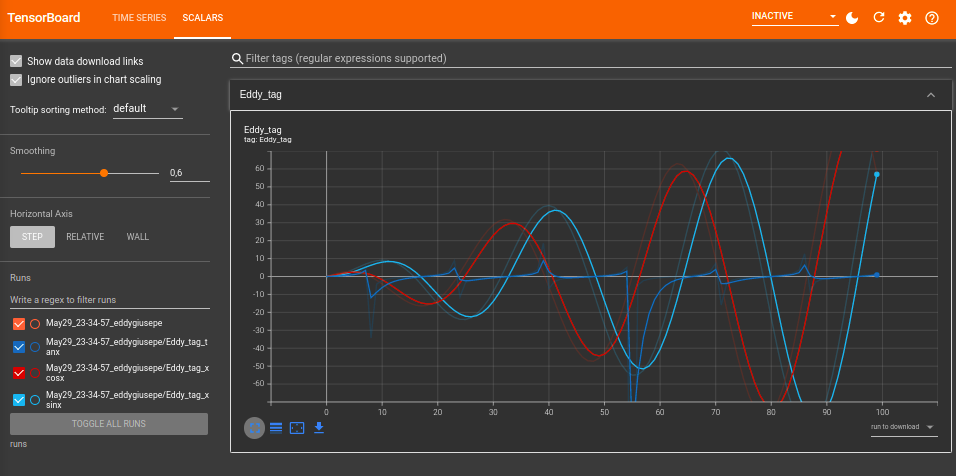

Podemos visualizar cada gráfico, também:

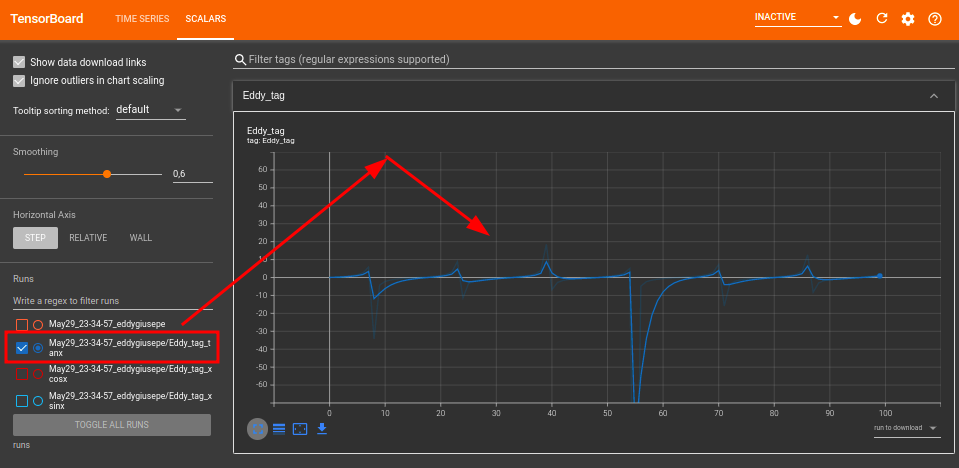

## <font color="red">Exemplo 3:</font>

Adicionando Histograma.